#### Creating the Grid
<br>
We start by defining a function create_grid that creates a 2D grid to represent the environment.
This function takes two arguments: width for the grid's width in cells and height for its height in cells. The grid is initialized with all cells set to 0, representing free space.

In [20]:
def create_grid(width, height):
    grid = []
    for _ in range(height):
        row = [0] * width
        grid.append(row)
    return grid


<br>

#### Setting Obstacles
<br>
The set_obstacle function is used to mark specific cells in the grid as obstacles, with the value 1. It takes three arguments: grid (the grid map representation), x (the X-coordinate of the cell), and y (the Y-coordinate of the cell). Obstacles are set by changing the value of the specified cell in the grid.

In [21]:
def set_obstacle(grid, x, y):
    if 0 <= x < len(grid[0]) and 0 <= y < len(grid):
        grid[y][x] = 1

<br>

#### Printing the Grid
<br>To visualize the grid, we use the print_grid function, which prints the grid map.

In [22]:
def print_grid(grid):
    for row in grid:
        print(" ".join([str(cell) for cell in row]))

<br>

#### Example Usage

In [23]:
width = 10
height = 10

grid = create_grid(width, height)

set_obstacle(grid, 1, 8)
set_obstacle(grid, 3, 2)


print_grid(grid)


0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0
0 0 0 1 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0
0 1 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0


<br><br><br>

### Cost Function and Heuristic
#### Cost Function
The cost function cost_function assigns a cost value to each action the robot takes. It considers factors such as terrain type (carpet vs. hardwood) and energy expenditure for turns to determine the cost of movement.

In [24]:
def cost_function(action, terrain_type):
    # Default unit cost for movement
    base_cost = 1

    if terrain_type == "carpet":
        # Higher cost for moving on carpet
        movement_cost = base_cost * 2
    else:
        movement_cost = base_cost

    if action in ["LEFT", "RIGHT"]:
        # Add turn cost to movement cost for turning actions
        total_cost = movement_cost + 2
    else:
        # No extra cost for straight movements
        total_cost = movement_cost

    return total_cost


#### Cost function Test
<br>
The cost_function calculates the cost of a robot's action based on the terrain type and the action taken. It considers two factors, movement cost and turn cost. The movement cost is doubled if the robot is on carpet terrain, and the turn cost is higher for turning actions (LEFT or RIGHT) compared to straight movements (UP or DOWN).

Testing Expectations:

1. When the robot moves UP or DOWN on hardwood terrain, the cost should be 1.
2. When the robot moves LEFT or RIGHT on hardwood terrain, the cost should be 3.
3. When the robot moves UP or DOWN on carpet terrain, the cost should be 2.
4. When the robot moves LEFT or RIGHT on carpet terrain, the cost should be 4.




When the robot moves UP or DOWN on hardwood terrain, the cost should be 1:


In [25]:
print(cost_function("UP", "hardwood"))  # Output: 1
print(cost_function("DOWN", "hardwood"))  # Output: 1

1
1


When the robot moves LEFT or RIGHT on hardwood terrain, the cost should be 3:

In [26]:
print(cost_function("LEFT", "hardwood"))  # Output: 3
print(cost_function("RIGHT", "hardwood"))  # Output: 3

3
3


When the robot moves UP or DOWN on carpet terrain, the cost should be 2 (doubled movement cost):

In [27]:
print(cost_function("UP", "carpet"))  # Output: 2
print(cost_function("DOWN", "carpet"))  # Output: 2

2
2


When the robot moves LEFT or RIGHT on carpet terrain, the cost should be 4:

In [28]:
print(cost_function("LEFT", "carpet"))  # Output: 4
print(cost_function("RIGHT", "carpet"))  # Output: 4

4
4


<br>

#### Heuristic Function
The heuristic function estimates the remaining distance for the robot to reach the cleaning target. It considers obstacles in the environment and penalizes paths that require extensive navigation around them.

<br>

#### Calculate Manhattan Distance Function

Calculating the Manhattan distance between two points, representing a simple heuristic that estimates the remaining distance for the robot to reach the cleaning target. This function ignores obstacles in the environment.

In [29]:
def manhattan_distance(start, end):
    return abs(start[0] - end[0]) + abs(start[1] - end[1])


#### Handle Obstacle Function

The purpose of this function is to handle obstacles in the environment when calculating the heuristic. It checks if a specific grid cell contains an obstacle and penalizes paths that would require the robot to navigate around obstacles. The function calculates the distances between the robot's current position, the obstacle, and the target position to determine if the path should be penalized.

<br>

The way this is working is basically helping the robot select paths that are not only direct (shortest, straight without detours) but also avoid obstacles between the robot's current position, the obstacle, and the target position.


In [30]:
def handle_obstacle(current_position, target_position, grid, heuristic_value, row, col):
    if grid[row][col] == 1:
        obstacle_position = (col, row)
        obstacle_distance = manhattan_distance(current_position, obstacle_position)
        target_obstacle_distance = manhattan_distance(obstacle_position, target_position)

        # Penalize paths that require navigation around obstacles
        if obstacle_distance + target_obstacle_distance < heuristic_value:

            # Penalize heavily for navigating around obstacles
            heuristic_value += 10
    return heuristic_value

#### Testing handle_obstacle

This function is expected to handle obstacles encountered during path finding and update the heuristic value accordingly.

The higher heuristic value indicates that encountering an obstacle has made the path longer and more complex, leading to a higher estimated cost to reach the goal. This tells us that the algorithm is appropriately considering obstacles and adjusting its estimates accordingly for more accurate path finding.

In [31]:
current_position = (0, 0)
target_position = (9, 9)

print_grid(grid)

heuristic_value = 20

# Check a cell with an obstacle and update the heuristic value
updated_heuristic_value = handle_obstacle(current_position, target_position, grid, heuristic_value, 2, 2)
print(f"Updated heuristic value: {updated_heuristic_value}")

0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0
0 0 0 1 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0
0 1 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0
Updated heuristic value: 20


#### Heuristic Function

This code is the heuristic function for path finding, taking into account obstacles in the grid. It calculates the Manhattan distance between the current position and the target position as the initial heuristic value. Then, it iterates through each cell in the grid to check for obstacles, updating the heuristic value based on the obstacle penalty using the `handle_obstacle` function. Finally, it returns the updated heuristic value, incorporating penalties for navigating around obstacles to provide a more accurate estimate of the remaining distance to reach the target.

In [32]:
def heuristic(current_position, target_position, grid):

    # Calculate the Manhattan distance
    heuristic_value = manhattan_distance(current_position, target_position)

    # Penalize paths that require navigation around obstacles
    for row in range(len(grid)):
        for col in range(len(grid[0])):
            heuristic_value = handle_obstacle(current_position, target_position, grid, heuristic_value, row, col)

    return heuristic_value


<br>

#### Test Heuristic Function

This test scenario calculates the estimated remaining distance for a robot to reach a target position from a given current position on a grid potentially containing obstacles. The test sets the current position as `(2, 2)` and the target position as `(9, 9)`. It then calls the `heuristic` function with these positions and the grid, aiming to verify the function's functionality in calculating the heuristic value considering Manhattan distance and obstacle penalties. The resulting `estimated_distance` value from the test is printed to demonstrate the estimated remaining distance, taking into account obstacles in the environment.

In [33]:
current_position = (2, 2)
target_position = (9, 9)

estimated_distance = heuristic(current_position, target_position, grid)
print(f"Estimated remaining distance with obstacles: {estimated_distance}")


Estimated remaining distance with obstacles: 14


<br><br><br>

#### A* Implementation and Testing
#### A* Implementation

Implemention of the A* search algorithm to find the optimal path for the robot to navigate
from its starting position to clean every cell in the environment and finally reach the
charging station (another designated cell).


In [34]:
import heapq

# Define cell types
EMPTY = 0
OBSTACLE = 1

# Define a class for the A* node
class Node:
    def __init__(self, position, parent=None):
        self.position = position
        self.parent = parent
        self.g = 0  # Cost from start node to current node
        self.h = 0  # Heuristic value (estimated cost from current node to goal)
        self.f = 0  # Total cost (g + h)

    def __lt__(self, other):
        return self.f < other.f



# Define the A* search function
def astar_search(grid, start, end):
    # Initialize the open list (priority queue) with the start node
    open_list = []
    heapq.heappush(open_list, (0, Node(start)))

    # Initialize the closed list (set of visited nodes)
    closed_list = set()

    while open_list:
        # Pop the node with the lowest f value from the open list
        _, current_node = heapq.heappop(open_list)

        # Add current node to the closed list
        closed_list.add(current_node.position)

        # Check if the current node is the goal
        if current_node.position == end:
            path = []
            while current_node:
                path.append(current_node.position)
                current_node = current_node.parent
            return path[::-1]  # Reverse the path to start from the start node

        # Generate successor nodes
        for action in ["LEFT", "RIGHT", "UP", "DOWN"]:
            row, col = current_node.position
            if action == "LEFT":
                col -= 1
            elif action == "RIGHT":
                col += 1
            elif action == "UP":
                row -= 1
            elif action == "DOWN":
                row += 1

            # Check if the successor position is valid and not an obstacle
            if 0 <= row < len(grid) and 0 <= col < len(grid[0]) and grid[row][col] != OBSTACLE and (row, col) not in closed_list:
                # Calculate the cost for the current action
                terrain_type = "carpet" if grid[row][col] == 3 else "floor"
                cost = cost_function(action, terrain_type)

                # Create the successor node
                successor = Node((row, col), parent=current_node)
                successor.g = current_node.g + cost
                successor.h = heuristic(successor.position, end, grid)
                successor.f = successor.g + successor.h

                # Add the successor node to the open list
                heapq.heappush(open_list, (successor.f, successor))

    return None


#### Testing the A* Algorithm

The algorithm returns the path from the stated start position to the end, ensuring it avoids obstacles

In [35]:
start_position = (0, 0)
end_position = (9, 9)

print_grid(grid)
print(grid)
path = astar_search(grid, start_position, end_position)

print("Optimal Path:", path)

0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0
0 0 0 1 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0
0 1 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
Optimal Path: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (6, 1), (7, 1), (7, 2), (8, 2), (8, 3), (8, 4), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9)]


<br>

#### Visualizing the environment and the path

This code defines a function called `plot` that takes a grid and a path as inputs. It uses matplotlib and numpy to plot a grid with obstacles represented as black squares and an optimal path represented as gray squares. The plot includes grid lines, hides x and y labels, inverts the y-axis for correct orientation, and removes the border around the plot. Finally, it displays the plot using `plt.show()`.

In [36]:
import matplotlib.pyplot as plt
import numpy as np

def plot(grid, path):
    grid = np.array(grid)

    num_rows, num_cols = grid.shape

    fig, ax = plt.subplots()
    ax.imshow([[0]], cmap='binary', extent=[0, num_cols, 0, num_rows])

    for i in range(num_rows):
        for j in range(num_cols):
            if grid[i][j] == 1:
                ax.add_patch(plt.Rectangle((j, i), 1, 1, color='black', linewidth=0))

    for pos in path:
        ax.add_patch(plt.Rectangle((pos[1], pos[0]), 1, 1, color='lightgray', linewidth=0))

    ax.set_xticks(np.arange(num_cols) + 0.5)
    ax.set_yticks(np.arange(num_rows) + 0.5)
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    ax.invert_yaxis()

    ax.axis('off')

    plt.show()




<br>

#### Diverse Environment Testing

Try out your path finding algorithm on a range of environments with unique obstacle arrangements and destination setups.








<br><br><br>

#### Environment A

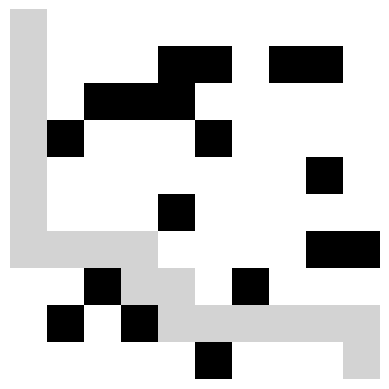

In [37]:
#Environment A configuration

width = 10
height = 10

grid = create_grid(width, height)


#Adding obstacles to the environment

set_obstacle(grid, 1, 8)
set_obstacle(grid, 3, 2)
set_obstacle(grid, 5, 1)
set_obstacle(grid, 8, 4)
set_obstacle(grid, 2, 2)
set_obstacle(grid, 5, 3)
set_obstacle(grid, 9, 6)
set_obstacle(grid, 4, 2)
set_obstacle(grid, 6, 7)
set_obstacle(grid, 8, 1)
set_obstacle(grid, 4, 5)
set_obstacle(grid, 7, 1)
set_obstacle(grid, 2, 7)
set_obstacle(grid, 5, 9)
set_obstacle(grid, 1, 3)
set_obstacle(grid, 3, 8)
set_obstacle(grid, 8, 6)
set_obstacle(grid, 4, 1)


#justifying the start which is the position of the robot and the target
start_position = (0, 0)
end_position = (9, 9)


path = astar_search(grid, start_position, end_position)


#Visualize the path
plot(grid, path)

<br><br><br>

#### Environment B

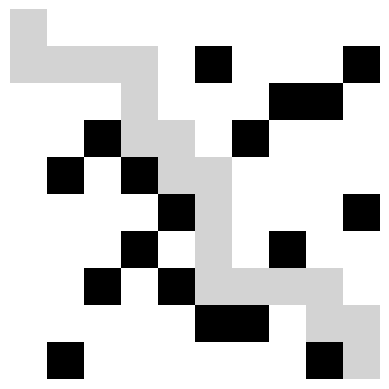

In [38]:
#Environment A configuration

width = 10
height = 10

grid = create_grid(width, height)


#Adding obstacles to the environment

set_obstacle(grid, 2, 7)
set_obstacle(grid, 4, 5)
set_obstacle(grid, 6, 3)
set_obstacle(grid, 9, 1)
set_obstacle(grid, 3, 4)
set_obstacle(grid, 5, 8)
set_obstacle(grid, 1, 9)
set_obstacle(grid, 8, 2)
set_obstacle(grid, 7, 6)
set_obstacle(grid, 4, 7)
set_obstacle(grid, 9, 5)
set_obstacle(grid, 2, 3)
set_obstacle(grid, 6, 8)
set_obstacle(grid, 5, 1)
set_obstacle(grid, 1, 4)
set_obstacle(grid, 8, 9)
set_obstacle(grid, 3, 6)
set_obstacle(grid, 7, 2)



#justifying the start which is the position of the robot and the target
start_position = (0, 0)
end_position = (9, 9)


path = astar_search(grid, start_position, end_position)


#Visualize the path
plot(grid, path)